In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import joblib

# 1.EDA

In [100]:
df = pd.read_csv('data/Verizon Data.csv')

In [101]:
df.head()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
0,2020,1,12,2178.85,250.00,6.0,1928.85,321.475000,4,1,0,2,0
1,2020,6,15,1543.65,1543.65,6.0,0.00,0.000000,1,0,0,2,0
2,2020,4,19,1107.67,125.00,5.0,982.67,196.534000,1,0,0,2,0
3,2020,3,17,950.44,237.61,9.0,712.83,79.203333,5,0,0,1,0
4,2020,8,21,1436.00,250.00,9.0,1186.00,131.777778,3,0,0,2,0


In [102]:
df.count()

year               24833
month              24833
day                24833
price              24833
downpmt            24833
monthdue           24833
payment_left       24833
monthly_payment    24833
pmttype            24833
credit_score       24833
age                24833
gender             24833
default            24833
dtype: int64

In [103]:
df.groupby("month")["default"].mean()

month
1     0.111165
2     0.105877
3     0.122088
4     0.128280
5     0.118885
6     0.103977
7     0.106256
8     0.120192
9     0.121798
10    0.113962
11    0.109204
12    0.118547
Name: default, dtype: float64

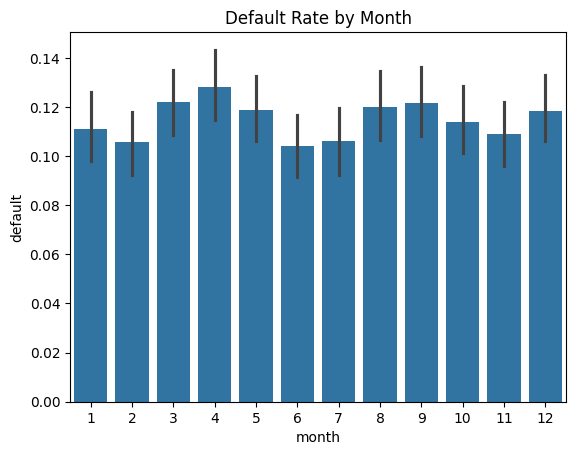

In [104]:
sns.barplot(x='month', y='default', data=df)
plt.title("Default Rate by Month")
plt.show()

<Axes: xlabel='default', ylabel='price'>

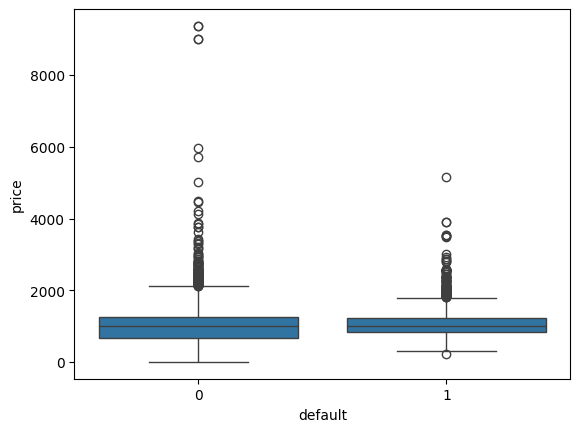

In [105]:
sns.boxplot(x="default", y="price", data=df)

<Axes: xlabel='default', ylabel='payment_left'>

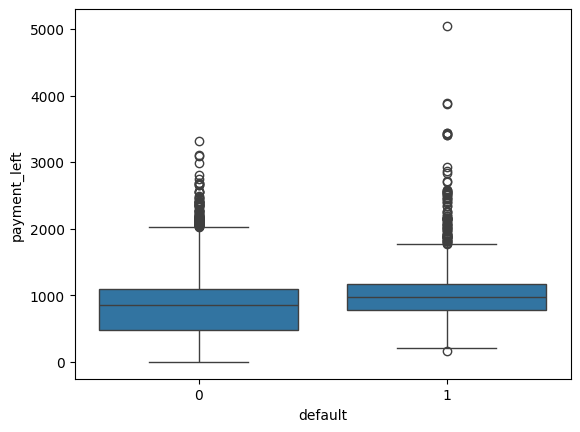

In [106]:
sns.boxplot(x="default", y="payment_left", data=df)

<Axes: xlabel='default', ylabel='monthly_payment'>

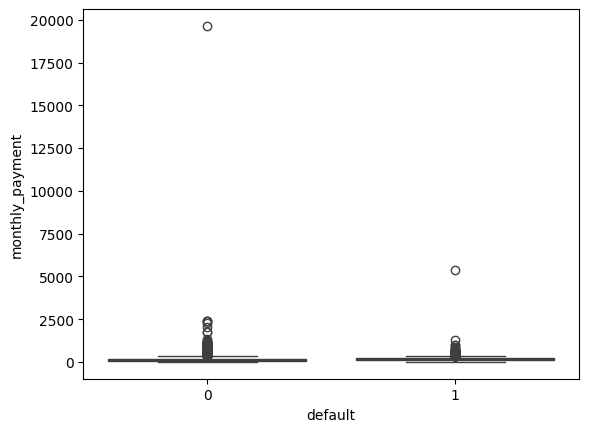

In [107]:

sns.boxplot(x="default", y="monthly_payment", data=df)

<Axes: xlabel='default', ylabel='credit_score'>

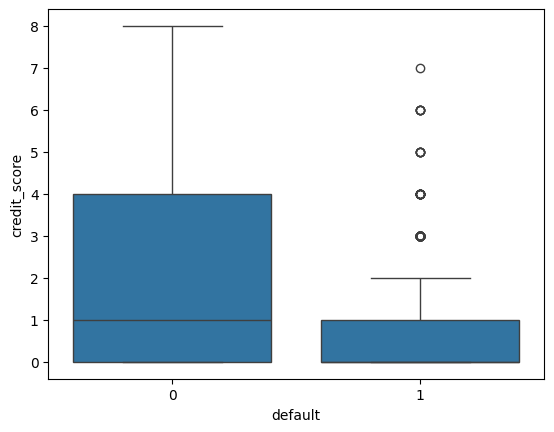

In [108]:

sns.boxplot(x="default", y="credit_score", data=df)

# 2.Data Cleaning

In [109]:
(df["age"]==0).sum()

np.int64(1138)

In [110]:
df = df[df["age"]!=0]
df.count()

year               23695
month              23695
day                23695
price              23695
downpmt            23695
monthdue           23695
payment_left       23695
monthly_payment    23695
pmttype            23695
credit_score       23695
age                23695
gender             23695
default            23695
dtype: int64

In [111]:
df.describe()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
count,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000,23695.000000
mean,2020.630260,6.498460,13.052205,998.173661,192.372909,8.252877,805.800751,144.490794,3.105043,1.963452,30.601730,1.494577,0.117578
std,0.482745,3.460406,7.173996,424.453295,313.459669,6.933948,464.260602,190.885606,1.557723,2.321725,11.911456,0.499981,0.322114
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2020.000000,3.000000,7.000000,699.000000,44.000000,5.500000,549.000000,63.255952,1.000000,0.000000,23.000000,1.000000,0.000000
50%,2021.000000,6.000000,13.000000,999.000000,100.000000,6.000000,854.000000,117.411765,3.000000,1.000000,28.000000,1.000000,0.000000
75%,2021.000000,10.000000,19.000000,1248.000000,175.000000,9.000000,1108.000000,184.676061,4.000000,3.500000,37.000000,2.000000,0.000000
max,2021.000000,12.000000,25.000000,9000.000000,9000.000000,120.000000,5045.000000,19639.750000,5.000000,8.000000,99.000000,2.000000,1.000000


In [112]:
df = df.drop(columns=["year", "day"])

In [113]:
df.head()

,month,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
1138,4,1523.00,125.0,2.62,1398.00,533.587786,5,1,1,2,0
1139,9,1568.75,51.0,8.00,1517.75,189.718750,3,1,1,2,0
1140,6,1303.00,125.0,7.87,1178.00,149.682338,4,4,1,1,0
1141,11,1132.08,200.0,6.00,932.08,155.346667,4,3,1,2,0
1142,5,312.00,312.0,96.00,0.00,0.000000,1,1,2,2,0


# 3. Model Training

## 3.1 Logistic Regression

In [114]:
df_encoded = pd.get_dummies(df, columns=["gender", "pmttype"], drop_first=True)

In [115]:
X = df_encoded.drop(columns=["default"])
y = df_encoded["default"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [118]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      4201
           1       0.39      0.89      0.55       538

    accuracy                           0.83      4739
   macro avg       0.69      0.86      0.72      4739
weighted avg       0.92      0.83      0.86      4739

[[3459  742]
 [  57  481]]


/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/qinkaiyin/Verizon/verizon/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## 3.2 RandomForest

In [119]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [120]:
y_pred = rf_model.predict(X_test)

In [121]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4201
           1       0.66      0.49      0.56       538

    accuracy                           0.91      4739
   macro avg       0.80      0.73      0.76      4739
weighted avg       0.91      0.91      0.91      4739

[[4066  135]
 [ 274  264]]


## 3.3 LightGBM

In [138]:
model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

[LightGBM] [Info] Number of positive: 2248, number of negative: 16708
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 18956, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [139]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      4201
           1       0.43      0.90      0.58       538

    accuracy                           0.85      4739
   macro avg       0.71      0.87      0.75      4739
weighted avg       0.92      0.85      0.87      4739

[[3555  646]
 [  54  484]]


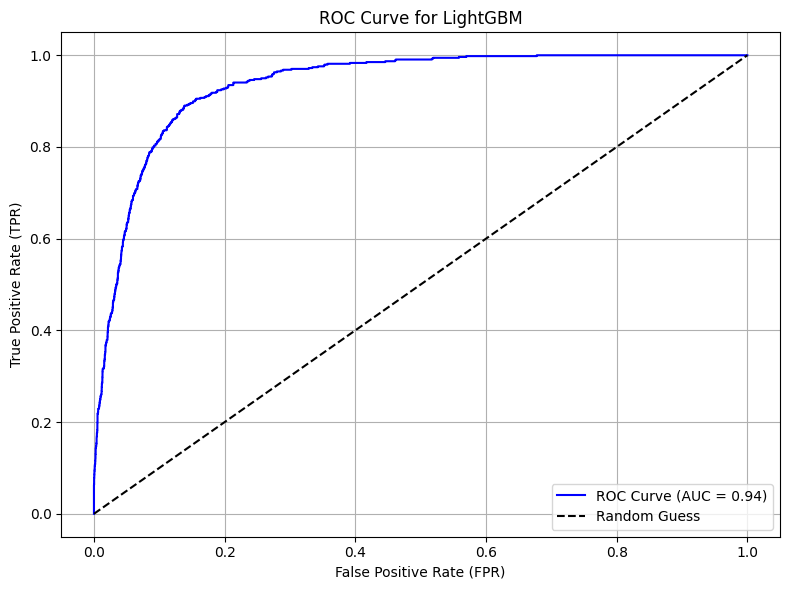

In [142]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Save Model

In [145]:
joblib.dump(model, 'Verizon_lightgbm_model.pkl')

['Verizon_lightgbm_model.pkl']